In [1]:
import pandas as pd
from util.load_data import (
    load_ve_balances,
    load_lp_rewards,
    load_nft_rewards,
    load_ve_allocations_pct,
    cal_ve_allocations,
    load_nft_lp_rewards,
    load_nft_vol
)
from util.plot import sns_cat, plot_allocation_reward_sankey, plot_allocation_reward_sankey_2
from util.load_data_for_sankey import load_nodes_and_links

ModuleNotFoundError: No module named 'util'

In [3]:
wallet_dict = {
    "0x8475b523b5fa2db7b77eb5f14edabdefc2102698": "psdn",
    "0x2e434c18ae93ee2da937222ea5444692ed265ac0": "whale1",
    "0xc1b8665bae4389d95d558ff3a0e58c2a24625f63": "whale2",
    "0xac517ed8283d629dd01fac97ece9f91b218203f9": "whale3",
    "0xf0a8802509421df907188434d4fc230cf9271672": "shrimp1",
    "0xcf8a4b99640defaf99acae9d770dec9dff37927d": "shrimp2",
    "0x663052ad99b85a8c35040c4fd1cc87620f4b61f1": "shrimp3",
    "0xeb18bad7365a40e36a41fb8734eb0b855d13b74f": "owner1"
}

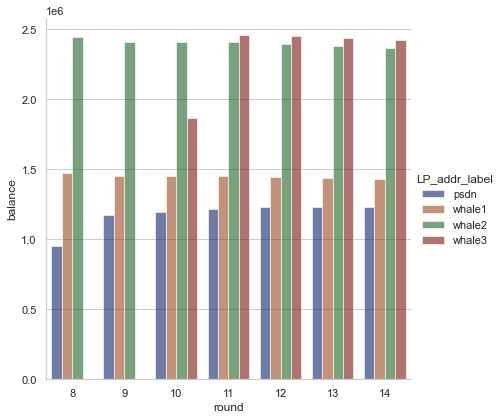

In [3]:
# 1. Who has veOcean
_df = load_ve_balances()
_df['LP_addr_label'] = _df['LP_addr'].map(wallet_dict)

_df = _df.loc[(_df['perc'] >= 5)]
sns_cat(_df, x="round", y="balance", hue="LP_addr_label",)

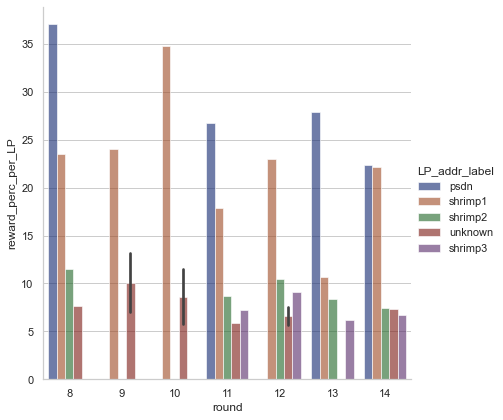

In [4]:
# 2. Who got rewarded, how much
_df = load_lp_rewards()

_df = _df.loc[(_df['reward_perc_per_LP'] >= 5)]
_df['LP_addr_label'] = _df['LP_addr'].map(wallet_dict)
_df['LP_addr_label'] = _df['LP_addr_label'].fillna(value='unknown')

sns_cat(_df, x="round", y="reward_perc_per_LP", hue="LP_addr_label")

- veOcean whales are not ones who got rewarded but shrimps
- where veOcean allocated and how much reward LP got from it?

In [5]:
ve_allocations_pct = load_ve_allocations_pct()
ve_balances = load_ve_balances()
ve_allocations = cal_ve_allocations(ve_balances, ve_allocations_pct, wallet_dict)

nft_rewards = load_nft_rewards()

nft_lp_rewards = load_nft_lp_rewards(wallet_dict)

In [6]:
ve_allocations

,LP_addr,balance,perc,round,locked_amt,unlock_time,chainID,nft_addr,percent,allocation,LP_addr_label
0,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x0e122f7d453e983ef0233af4e2af4cb053e5f075,0.200,2.724518,unknown
1,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x08d2ef7c255834dbb7513e8b3e744d05748a7079,0.800,10.898072,unknown
2,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,0.026,0.354187,unknown
3,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x10f6733a38a0c4e401f9150f11902427ce900df3,0.182,2.479311,unknown
4,0x5bb103c0b54cc23d26c3a32276b06470dc5ceba6,3.793925e+01,0.000305,8,NaN,NaN,NaN,NaN,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
7889,0x8475b523b5fa2db7b77eb5f14edabdefc2102698,1.234123e+06,7.418847,14,1.245399e+06,1.795651e+09,137,0x0e122f7d453e983ef0233af4e2af4cb053e5f075,0.000,0.000000,psdn
7890,0x8475b523b5fa2db7b77eb5f14edabdefc2102698,1.234123e+06,7.418847,14,1.245399e+06,1.795651e+09,137,0x08d2ef7c255834dbb7513e8b3e744d05748a7079,0.000,0.000000,psdn
7891,0x2e434c18ae93ee2da937222ea5444692ed265ac0,1.428885e+06,8.589646,14,1.500000e+06,1.790813e+09,NaN,NaN,NaN,NaN,whale1
7892,0xc1b8665bae4389d95d558ff3a0e58c2a24625f63,2.369947e+06,14.246776,14,2.487898e+06,1.790813e+09,NaN,NaN,NaN,NaN,whale2


In [7]:
# round 11
# _wallet_labels = ["whale1", "whale2", "whale3"]
_wallet_labels = ["shrimp1", "shrimp2", "shrimp3", "psdn"]
# df_nodes, df_links = load_nodes_and_links(ve_allocations, nft_lp_rewards, "psdn", 11)

for _wallet_label in _wallet_labels:
    _df_nodes, _df_links = load_nodes_and_links(ve_allocations, nft_lp_rewards, _wallet_label, 14)
    # df_nodes = df_nodes.append(_df_nodes, ignore_index=True)
    # df_links = df_links.append(_df_links, ignore_index=True)
    plot_allocation_reward_sankey(_df_nodes, _df_links, _wallet_label)

In [8]:
# round 11
_wallet_labels = [
    # "whale1", "whale2", "whale3", 
    "psdn"]
# _wallet_labels = ["shrimp1", "shrimp2", "shrimp3", "psdn"]
# df_nodes, df_links = load_nodes_and_links(ve_allocations, nft_lp_rewards, "psdn", 11)

for _wallet_label in _wallet_labels:
    _df_nodes, _df_links = load_nodes_and_links(ve_allocations, nft_lp_rewards, _wallet_label, 14)
    # df_nodes = df_nodes.append(_df_nodes, ignore_index=True)
    # df_links = df_links.append(_df_links, ignore_index=True)
    plot_allocation_reward_sankey(_df_nodes, _df_links, _wallet_label)

- Reward per nft for round 12, psdn got 0, most goes to 0x596, the one that we spotted last round
- This round it's even easier for him, just need 1-2 buys

In [9]:
_df = load_nft_rewards()
_df.loc[_df['round']==14].sort_values(['reward_amount'], ascending=False)

,nft,reward_amount,reward_perc,round
77,0xaa8af64ee67bc318d513a6562f096db7fcd5233b,35126.429060,84.490272,14
79,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,3290.124993,7.913801,14
80,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,3124.334410,7.515021,14
83,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,6.123141,0.014728,14
81,0xe10f6940c84b1bf8477fda04335405841b66cec7,6.123141,0.014728,14
75,0xca63894b1c911515f1c034be3509afc008b42d83,5.612879,0.013501,14
74,0xfb36bfee83c3724b46d70833b740854052b225a3,5.102618,0.012273,14
73,0xb3d1b43b4f8ed8ed23868987e7a6fe64f886de0c,5.102618,0.012273,14
76,0x12c79518e69339849ec646cdaf491c25e9c73238,5.102618,0.012273,14
82,0x66405cc1876e49ecd3f9771b030046f5f328892a,0.223877,0.000538,14


In [10]:
ve_allocations.loc[(ve_allocations['nft_addr'] == '0x59638f2858a5102b601297e76f3026bee92402f7') & (ve_allocations['round'] == 14)]
    # (ve_allocations['LP_addr_label'] in list(wallet_dict.values()))]
# ve_allocations.query("(nft_addr == '0x59638f2858a5102b601297e76f3026bee92402f7') and (LP_addr_label == 'psdn')")


,LP_addr,balance,perc,round,locked_amt,unlock_time,chainID,nft_addr,percent,allocation,LP_addr_label
6449,0x2b66bbd19eff51143d9c8a0fb5e1671b7cc9471f,1.272429e+01,0.000076,14,1.170000e+02,1.684368e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,1.000000,12.724294,unknown
6452,0x6894ff417db1e8cd9756a456d977cdf8817bb4b0,1.668492e+01,0.000100,14,1.297000e+03,1.672272e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.250000,4.171231,unknown
6458,0xdd19387e922038938202071126096dca08ff148a,2.561020e+01,0.000154,14,5.000000e+02,1.677110e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.400000,10.244081,unknown
6468,0x1e2394b6b88f9329127d98347f6e696e4af33e13,3.714535e+01,0.000223,14,4.940000e+02,1.680134e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.340000,12.629418,unknown
6477,0x847b4092a678263ed08d0eeb98e9b0844d6df3fd,7.039849e+01,0.000423,14,1.000000e+03,1.679530e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.340000,23.935486,unknown
...,...,...,...,...,...,...,...,...,...,...,...
7824,0xcf8a4b99640defaf99acae9d770dec9dff37927d,2.857771e+05,1.717929,14,3.000000e+05,1.790813e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.310000,88590.895096,shrimp2
7839,0x8978be1b2082d10ea95533d2897ddab53afb97e9,2.973415e+05,1.787448,14,3.000000e+05,1.796256e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.320000,95149.268645,unknown
7863,0x663052ad99b85a8c35040c4fd1cc87620f4b61f1,4.955691e+05,2.979080,14,5.000000e+05,1.796256e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.256000,126865.691527,shrimp3
7870,0xf0a8802509421df907188434d4fc230cf9271672,5.853302e+05,3.518672,14,6.175700e+05,1.790208e+09,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.000000,0.000000,shrimp1


In [11]:
ve_allocations.query("((LP_addr_label == 'shrimp1') or (LP_addr_label == 'psdn')) and (round == 13) and (nft_addr == '0x59638f2858a5102b601297e76f3026bee92402f7')")


,LP_addr,balance,perc,round,locked_amt,unlock_time,chainID,nft_addr,percent,allocation,LP_addr_label
6423,0xf0a8802509421df907188434d4fc230cf9271672,5.887056e+05,3.564630,13,NaN,NaN,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.620000,364997.483232,shrimp1
6439,0x8475b523b5fa2db7b77eb5f14edabdefc2102698,1.232366e+06,7.462011,13,NaN,NaN,137,0x59638f2858a5102b601297e76f3026bee92402f7,0.773268,952948.971083,psdn


nft volume:
- 0x59638f2858a5102b601297e76f3026bee92402f7 got 50k volume by just 2 buys

In [12]:
_df = load_nft_vol()
_df.loc[_df['round']==14].sort_values(['vol_amt'], ascending=False).head(5)

,chainID,basetoken_addr,nft_addr,vol_amt,round
148,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xaa8af64ee67bc318d513a6562f096db7fcd5233b,70000.0,14
146,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,14111.0,14
145,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,13812.0,14
147,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,12.0,14
152,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xe10f6940c84b1bf8477fda04335405841b66cec7,12.0,14


### Shrimps
- whale doesn't LPing
- shrimp does
- in round 11
  - nft `0x59638f2858a5102b601297e76f3026bee92402f7` is the main reward source for all shrimps 
    - owner: `0xeb18bad7365a40e36a41fb8734eb0b855d13b74f`
    - datatoken: `0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6`
      - [link on market](https://market.oceanprotocol.com/asset/did:op:7fecc8927499753bee6dadf391be545f5ca642646e5c1e639d432b935cbeab8f)
      - who bought: shrimp1 & owner
  
  - for psdn:
    - `0x7c28f579fdb12b52a3a0bf27cef63868e26e0020`
    - `0xe10f6940c84b1bf8477fda04335405841b66cec7`
  - 

In [15]:
from util.load_data import query_nft_orders
nft_addr = '"0x59638f2858a5102b601297e76f3026bee92402f7"'
chainID = 137

orders = query_nft_orders(nft_addr, chainID)
orders["buyer_addr_label"] = orders["consumer.id"].map(wallet_dict)
orders["owner_addr_label"] = orders["datatoken.nft.owner.id"].map(wallet_dict)

orders.sort_values(['block']).reset_index(drop=True)

,block,amount,datatoken.id,datatoken.name,datatoken.lastPriceToken.id,datatoken.lastPriceValue,datatoken.nft.owner.id,consumer.id,buyer_addr_label,owner_addr_label
0,35446771,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
1,35488054,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
2,35524889,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,owner1,owner1
3,35549103,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
4,35599418,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
5,35640918,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
6,35674742,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,owner1,owner1
7,35683212,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
8,35729089,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
9,35729164,1,0x92ca723b61cbd933390aa58b83e1f00cedf4ebb6,Gentle Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,25000,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,owner1,owner1


In [17]:
nft_addr = '"0x7c28f579fdb12b52a3a0bf27cef63868e26e0020"'
chainID = 137

orders = query_nft_orders(nft_addr, chainID)
orders["buyer_addr_label"] = orders["consumer.id"].map(wallet_dict)
orders["owner_addr_label"] = orders["datatoken.nft.owner.id"].map(wallet_dict)

orders.sort_values(['block'])

,block,amount,datatoken.id,datatoken.name,datatoken.lastPriceToken.id,datatoken.lastPriceValue,datatoken.nft.owner.id,consumer.id,buyer_addr_label,owner_addr_label
6,35072316,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
5,35072372,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,owner1,owner1
1,35142879,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
2,35142963,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,owner1,owner1
9,35446244,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
7,35488107,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
0,35524865,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,owner1,owner1
8,35549153,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
4,35599466,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1
3,35640965,1,0x98113ebd0575f9c1de599a775fb3a5341c172216,Querulous Whale Token,0x282d8efce846a88b159800bd4130ad77443fa1a1,12500,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,0xf0a8802509421df907188434d4fc230cf9271672,shrimp1,owner1


In [18]:
ve_allocations

,LP_addr,balance,perc,round,locked_amt,unlock_time,chainID,nft_addr,percent,allocation,LP_addr_label
0,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x0e122f7d453e983ef0233af4e2af4cb053e5f075,0.200,2.724518,unknown
1,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x08d2ef7c255834dbb7513e8b3e744d05748a7079,0.800,10.898072,unknown
2,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,0.026,0.354187,unknown
3,0x903322c7e45a60d7c8c3ea236c5bea9af86310c7,1.362259e+01,0.000109,8,NaN,NaN,137,0x10f6733a38a0c4e401f9150f11902427ce900df3,0.182,2.479311,unknown
4,0x5bb103c0b54cc23d26c3a32276b06470dc5ceba6,3.793925e+01,0.000305,8,NaN,NaN,NaN,NaN,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
7889,0x8475b523b5fa2db7b77eb5f14edabdefc2102698,1.234123e+06,7.418847,14,1.245399e+06,1.795651e+09,137,0x0e122f7d453e983ef0233af4e2af4cb053e5f075,0.000,0.000000,psdn
7890,0x8475b523b5fa2db7b77eb5f14edabdefc2102698,1.234123e+06,7.418847,14,1.245399e+06,1.795651e+09,137,0x08d2ef7c255834dbb7513e8b3e744d05748a7079,0.000,0.000000,psdn
7891,0x2e434c18ae93ee2da937222ea5444692ed265ac0,1.428885e+06,8.589646,14,1.500000e+06,1.790813e+09,NaN,NaN,NaN,NaN,whale1
7892,0xc1b8665bae4389d95d558ff3a0e58c2a24625f63,2.369947e+06,14.246776,14,2.487898e+06,1.790813e+09,NaN,NaN,NaN,NaN,whale2


In [19]:
nft_rewards

,nft,reward_amount,reward_perc,round
0,0xb3d1b43b4f8ed8ed23868987e7a6fe64f886de0c,3.185573,0.031856,8
1,0x08d2ef7c255834dbb7513e8b3e744d05748a7079,9719.664714,97.196647,8
2,0x0e122f7d453e983ef0233af4e2af4cb053e5f075,230.489178,2.304892,8
3,0x12c79518e69339849ec646cdaf491c25e9c73238,5.374809,0.053748,8
4,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,6.344427,0.063444,8
...,...,...,...,...
80,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,3124.334410,7.515021,14
81,0xe10f6940c84b1bf8477fda04335405841b66cec7,6.123141,0.014728,14
82,0x66405cc1876e49ecd3f9771b030046f5f328892a,0.223877,0.000538,14
83,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,6.123141,0.014728,14


In [ ]:
nft_vols = load_nft_vol()
nft_vols

,chainID,basetoken_addr,nft_addr,vol_amt,round
0,137,0xpolygon,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,0.106462,8
1,1,0xmainnet,0xf8d238a05b92fef2b07dfbab030f3c0b28be15f6,0.002211,8
2,137,0xpolygon,0xe10f6940c84b1bf8477fda04335405841b66cec7,0.085717,8
3,137,0xpolygon,0x08d2ef7c255834dbb7513e8b3e744d05748a7079,0.419197,8
4,137,0xpolygon,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,0.048910,8
...,...,...,...,...,...
139,137,0xpolygon,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,0.173768,13
140,137,0xpolygon,0xe10f6940c84b1bf8477fda04335405841b66cec7,0.030565,13
141,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xfb36bfee83c3724b46d70833b740854052b225a3,210.000000,13
142,137,0xpolygon,0x59638f2858a5102b601297e76f3026bee92402f7,0.093019,13


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
import numpy as np
# contrived dataset
def make_prediction(df, col, historical_points):
    y=list(df[col])
    # x = list(range(0, y.shape[0]))
    data = y
    # fit model
    model = AutoReg(data, historical_points)
    model_fit = model.fit()

    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    # data.append(yhat)

    # for i in range(prediction_points):
    #     _yhat = model_fit.predict(len(data), len(data))
    #     yhat = np.concatenate((yhat, _yhat))
    #     data.append(yhat)
    return yhat

In [ ]:
nft_addr_list = nft_vols['nft_addr'].unique()
nft_vols = nft_vols.loc[(nft_vols['basetoken_addr'] == '0x282d8efce846a88b159800bd4130ad77443fa1a1') & (nft_vols['chainID'] == 137)]


nft_vols_prediction = pd.DataFrame(
        columns=["chainID", "basetoken_addr", "nft_addr", "vol_amt", "round"]
    )

for nft_addr in nft_addr_list:
    _df = nft_vols.loc[nft_vols['nft_addr'] == nft_addr]
    try:
        prediction = make_prediction(_df, 'vol_amt', 2)
        # print(prediction)
    except:
        prediction = 0
    
    prediction_df = pd.DataFrame(
                {
                    "chainID": 137,
                    "basetoken_addr": '0x282d8efce846a88b159800bd4130ad77443fa1a1',
                    "nft_addr": nft_addr,
                    "vol_amt": prediction,
                    "round": _df['round'].max() + 1,
                }, index=[0]
            )
    nft_vols_prediction = nft_vols_prediction.append(prediction_df, ignore_index=True)


# nft_vols['nft_addr'].unique()

In [ ]:
# make_prediction(_df, 'vol_amt', 2, 1)
_df['round'].max()
_df
nft_vols_prediction

,chainID,basetoken_addr,nft_addr,vol_amt,round
0,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,2679.420114,14
1,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xf8d238a05b92fef2b07dfbab030f3c0b28be15f6,0.000000,NaN
2,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xe10f6940c84b1bf8477fda04335405841b66cec7,16697.148137,14
3,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x08d2ef7c255834dbb7513e8b3e744d05748a7079,0.000000,10
4,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,2227.948433,14
5,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x9723488dc1524849a82917a61a38bbe24a8219c1,0.000000,NaN
6,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xfb36bfee83c3724b46d70833b740854052b225a3,2910.907155,14
7,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xca63894b1c911515f1c034be3509afc008b42d83,2878.808882,14
8,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xf4ea893763fb29df5e38b4f4d7a0d82cdd3defcc,0.000000,NaN
9,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xb3d1b43b4f8ed8ed23868987e7a6fe64f886de0c,2794.032514,14


In [ ]:
nft_rewards

,nft,reward_amount,reward_perc,round
0,0x9723488dc1524849a82917a61a38bbe24a8219c1,0.116176,0.001162,8
1,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,6.325265,0.063253,8
2,0xfb36bfee83c3724b46d70833b740854052b225a3,5.134754,0.051348,8
3,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,6.320765,0.063208,8
4,0xca63894b1c911515f1c034be3509afc008b42d83,8.543053,0.085431,8
...,...,...,...,...
67,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,2770.047714,6.301632,13
68,0xb3d1b43b4f8ed8ed23868987e7a6fe64f886de0c,157.119056,0.357433,13
69,0x59638f2858a5102b601297e76f3026bee92402f7,37409.299106,85.103092,13
70,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,173.579148,0.394878,13


In [ ]:
_df

,chainID,basetoken_addr,nft_addr,vol_amt,round


In [ ]:
nft_addr_list = nft_rewards['nft'].unique()
# nft_rewards = nft_rewards.loc[(nft_rewards['basetoken_addr'] == '0x282d8efce846a88b159800bd4130ad77443fa1a1') & (nft_rewards['chainID'] == 137)]


nft_rewards_prediction = pd.DataFrame(
        columns=["nft", "reward_perc", "round"]
    )

for nft_addr in nft_addr_list:
    _df = nft_rewards.loc[nft_rewards['nft'] == nft_addr]
    try:
        prediction = make_prediction(_df, 'reward_perc', 2)
        print(prediction)
    except:
        prediction = 0
    
    prediction_df = pd.DataFrame(
                {
                    "nft": nft_addr,
                    "reward_perc": prediction,
                    "round": _df['round'].max() + 1,
                }, index=[0]
            )
    nft_rewards_prediction = nft_rewards_prediction.append(prediction_df, ignore_index=True)


# nft_vols['nft_addr'].unique()

[2.30613626]
[1.35645556]
[2.7386016]
[0.6202047]
[8.81687593]
[2.00877039]
[1.85242466]
[1.40357621]


/Users/nvtrang/opt/anaconda3/envs/gvenv38/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
nft_rewards_prediction

,nft,reward_perc,round
0,0x9723488dc1524849a82917a61a38bbe24a8219c1,0,13
1,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,2.306136,14
2,0xfb36bfee83c3724b46d70833b740854052b225a3,1.356456,14
3,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,2.738602,14
4,0xca63894b1c911515f1c034be3509afc008b42d83,0.620205,14
5,0xe10f6940c84b1bf8477fda04335405841b66cec7,8.816876,14
6,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,2.00877,14
7,0xb3d1b43b4f8ed8ed23868987e7a6fe64f886de0c,1.852425,14
8,0x12c79518e69339849ec646cdaf491c25e9c73238,1.403576,14
9,0x0e122f7d453e983ef0233af4e2af4cb053e5f075,0,9


In [ ]:
nft_vols.to_csv('nft_vols_13.csv', index=None)
nft_rewards.to_csv('nft_rewards_13.csv', index=None)

In [ ]:
nft_vols_prediction.to_csv('nft_vols_prediction_14.csv', index=None)
nft_rewards_prediction.to_csv('nft_rewards_prediction_14.csv', index=None)


In [1]:
from utils.load_data import query_nft_owner, load_nft_vol
import pandas as pd
# query_nft_owner('"0xaa8af64ee67bc318d513a6562f096db7fcd5233b"', 137)
wallet_dict = {
    "0x8475b523b5fa2db7b77eb5f14edabdefc2102698": "psdn",
    "0x2e434c18ae93ee2da937222ea5444692ed265ac0": "whale1",
    "0xc1b8665bae4389d95d558ff3a0e58c2a24625f63": "whale2",
    "0xac517ed8283d629dd01fac97ece9f91b218203f9": "whale3",
    "0xf0a8802509421df907188434d4fc230cf9271672": "shrimp1",
    "0xcf8a4b99640defaf99acae9d770dec9dff37927d": "shrimp2",
    "0x663052ad99b85a8c35040c4fd1cc87620f4b61f1": "shrimp3",
    "0xeb18bad7365a40e36a41fb8734eb0b855d13b74f": "owner1"
}


In [2]:
nft_vol = load_nft_vol("/Users/nvtrang/code/h2o/df-strat/strat/tmp/1", "0x282d8efce846a88b159800bd4130ad77443fa1a1", wallet_dict)
nft_vol

# nft_vol['a'] = nft_vol['nft_addr'].apply(lambda x: query_nft_owner(x,137))
# nft_vol['owner'] = 
# ff= nft_vol.apply(lambda x: query_nft_owner(f'"{x.nft_addr}"', x.chainID), axis=1)




"0x8e1517057a2b30f29e0713c52ca5d957c887da74"
"0x8e1517057a2b30f29e0713c52ca5d957c887da74"
"0xca63894b1c911515f1c034be3509afc008b42d83"
"0xc36bc2aaa1dff1ff92f04dd89708608dc5715beb"
"0x40de175e5de5139c1e754d6fdc8b01ac23065700"
"0x7c28f579fdb12b52a3a0bf27cef63868e26e0020"
"0x9723488dc1524849a82917a61a38bbe24a8219c1"
"0x66405cc1876e49ecd3f9771b030046f5f328892a"
"0x12c79518e69339849ec646cdaf491c25e9c73238"
"0x001c3d7debe7eff4550a3414ad2fd542020ef947"
"0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf"
"0xe10f6940c84b1bf8477fda04335405841b66cec7"
"0x57c0d4d22ab9fb7071838db5a4ba3b1ddc4b3e24"
"0x2d84d50f8e310d370a6d7d0d883f3e537ecce382"
"0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a"
"0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4"
"0xb3d1b43b4f8ed8ed23868987e7a6fe64f886de0c"
"0xfb36bfee83c3724b46d70833b740854052b225a3"
"0xca63894b1c911515f1c034be3509afc008b42d83"
"0x7c28f579fdb12b52a3a0bf27cef63868e26e0020"
"0x12c79518e69339849ec646cdaf491c25e9c73238"
"0x001c3d7debe7eff4550a3414ad2fd542020ef947"
"0xc8bf9f2

,chainID,basetoken_addr,nft_addr,vol_amt,week,owner,owner_label,vol_perc
0,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x7c28f579fdb12b52a3a0bf27cef63868e26e0020,70000.0,50,0xeb18bad7365a40e36a41fb8734eb0b855d13b74f,owner1,98.292519
1,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x001c3d7debe7eff4550a3414ad2fd542020ef947,999.0,50,0x47c6547628da95a40d98b6ecf7ce9c6c0e2f9ae0,NaN,1.402775
2,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x57c0d4d22ab9fb7071838db5a4ba3b1ddc4b3e24,69.0,50,0x4ad829a7609357a7d05737526fe13bbdd18427b5,NaN,0.096888
3,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x2d84d50f8e310d370a6d7d0d883f3e537ecce382,49.0,50,0x4ad829a7609357a7d05737526fe13bbdd18427b5,NaN,0.068805
4,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x21457717da4d370ea16a8eaa3cb46ba2f9797ab4,22.0,50,0x2321756b2ede8ee6467cc85e15b6bd1fbd6c2fe4,NaN,0.030892
5,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xc8bf9f20fc169c3d74f0ec3ba1cd933b8beaafaf,12.0,50,0x4ab0c24005c410111e21ae16df5e19180fad0f6a,NaN,0.016850
6,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xe10f6940c84b1bf8477fda04335405841b66cec7,12.0,50,0x2321756b2ede8ee6467cc85e15b6bd1fbd6c2fe4,NaN,0.016850
7,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xd0d5d72554cb47d2ec07e0e849c1b8fae6bb5f3a,12.0,50,0xd70b21e388e15de10ef75c4b2030a70159e390d8,NaN,0.016850
8,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0xca63894b1c911515f1c034be3509afc008b42d83,11.0,50,0x4ab0c24005c410111e21ae16df5e19180fad0f6a,NaN,0.015446
9,137,0x282d8efce846a88b159800bd4130ad77443fa1a1,0x12c79518e69339849ec646cdaf491c25e9c73238,10.0,50,0x4ab0c24005c410111e21ae16df5e19180fad0f6a,NaN,0.014042


In [4]:
ff

0     0xeb18bad7365a40e36a41fb8734eb0b855d13b74f
1     0x47c6547628da95a40d98b6ecf7ce9c6c0e2f9ae0
2     0x4ad829a7609357a7d05737526fe13bbdd18427b5
3     0x4ad829a7609357a7d05737526fe13bbdd18427b5
4     0x2321756b2ede8ee6467cc85e15b6bd1fbd6c2fe4
5     0x4ab0c24005c410111e21ae16df5e19180fad0f6a
6     0x2321756b2ede8ee6467cc85e15b6bd1fbd6c2fe4
7     0xd70b21e388e15de10ef75c4b2030a70159e390d8
8     0x4ab0c24005c410111e21ae16df5e19180fad0f6a
9     0x4ab0c24005c410111e21ae16df5e19180fad0f6a
10    0xd70b21e388e15de10ef75c4b2030a70159e390d8
11    0xd70b21e388e15de10ef75c4b2030a70159e390d8
dtype: object

In [1]:
#tnv
'0xd3Fa48AA65C6701F2cf56662F669Fd6619799b71'.lower()

'0xd3fa48aa65c6701f2cf56662f669fd6619799b71'

In [19]:
# try query veAllocatons
# block_by_timestamp
import requests

from datetime import datetime, timezone

# dt = datetime(2008, 1, 1, 0, 0, 0, 0)
# int(dt.replace(tzinfo=timezone.utc).timestamp())
ts = int(datetime.utcnow().timestamp())
# ts = 
etherscan_api_token = "FM61KFUCQW6457RMVWQASMR8UKM2ZITJU9"
r = requests.get(f'https://api.etherscan.io/api?module=block&action=getblocknobytime&timestamp={ts}&closest=before&apikey={etherscan_api_token}', auth=('user', 'pass'))
r


<Response [200]>

In [26]:
int(r.json()['result'])
# r.text

16194166